In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/home/saad/Downloads/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Steps
* 1.Data Cleaning
* 2.EDA
* 3.Text Preprocessing
* 4.Text Presentation
* 5.Model Building
* 6.Evaluation
* 7.Improvement
* 8.Website
* 9.Deploy

## <u>1.Data Cleaning</u>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# I drop the last 3 feature because they has nan values so it's note good for my model
df.drop(df.iloc[:,2:], axis=1, inplace=True)

In [7]:
# after droping feature my data looks like something that!
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# rename the columns so that i can easily understand
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [9]:
df.sample(5) # show me randomly 5 rows

,target,text
658,ham,It doesnt make sense to take it there unless i...
4903,ham,"no, i *didn't* mean to post it. I wrote it, an..."
1278,ham,Can i meet Ì_ at 5.. As 4 where depends on whe...
2357,ham,Okay same with me. Well thanks for the clarifi...
4982,ham,Networking job is there.


In [10]:
# encode the target feature into numbers
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['target'] = en.fit_transform(df['target'])

In [11]:
df.sample(5)

,target,text
4462,0,He said i look pretty wif long hair wat. But i...
318,1,December only! Had your mobile 11mths+? You ar...
3504,0,"life alle mone,eppolum oru pole allalo"
2750,0,Ok but tell me half an hr b4 u come i need 2 p...
3861,0,"Customer place, i wil cal u sir."


In [12]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicates values
df.duplicated().sum()

403

In [14]:
# remove duplicates
df.drop_duplicates(keep='first', inplace=True)

In [15]:
print(df.duplicated().sum()) # so duplicated values drop successfully
print(df.shape) # and shape would be this after droping duplicate values

0
(5169, 2)


## <u>2.EDA</u>

In [16]:
# checking the imbalanced target feature
df.target.value_counts()
# my data is imbalanced so i need to remember that

0    4516
1     653
Name: target, dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='target', ylabel='count'>

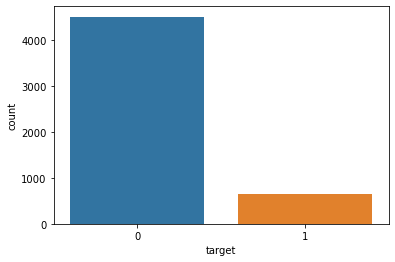

In [18]:
# imbalaned target feature visualization
sns.countplot(df['target'], orient=True)

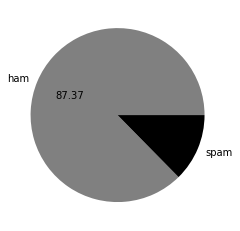

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f", colors=['gray','k'])
plt.show()

In [20]:
import nltk
nltk.download('punkt') # this is must to download for using nltk library 

[nltk_data] Downloading package punkt to /home/saad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# count number of character in text
df['num_characters'] = df['text'].apply(len)

In [22]:
# count number of words in text
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
# count number of sentence in text
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
# getting more information of features
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# information for (ham) type
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# information for (spam) type
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


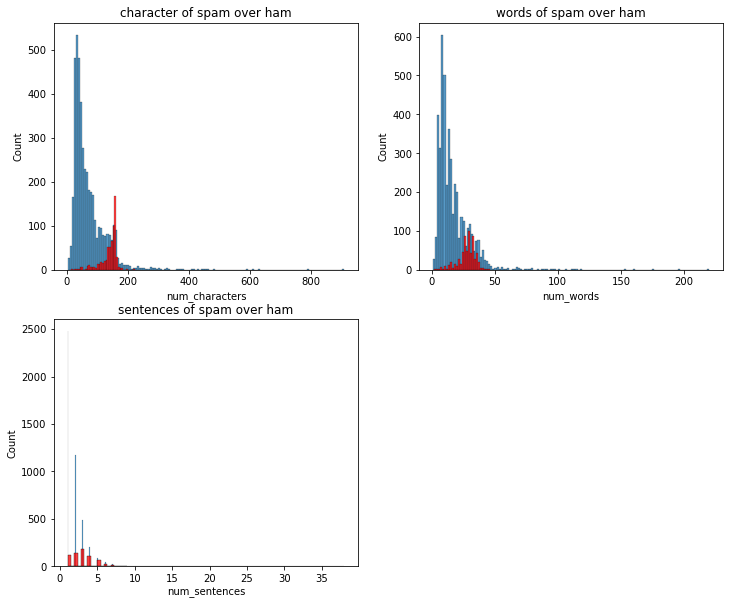

In [27]:
# draw cahracters of different typs upon each other
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.title('character of spam over ham')

plt.subplot(2,2,2)
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.title('words of spam over ham')

plt.subplot(2,2,3)
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')
plt.title('sentences of spam over ham')
plt.show()

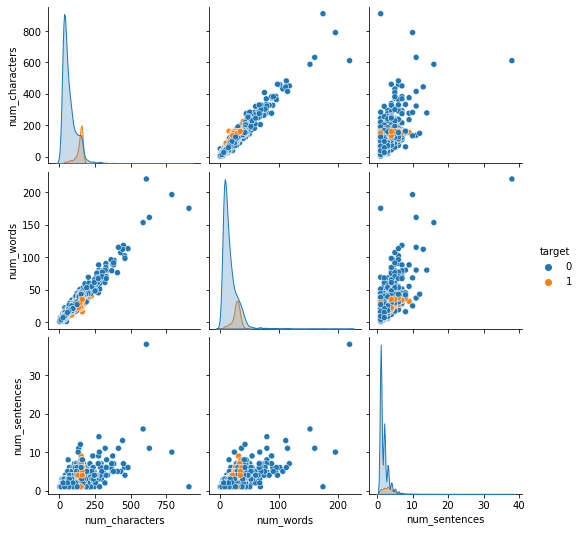

In [28]:
# draw the pair plot to see the collinearity
sns.pairplot(df,hue='target')

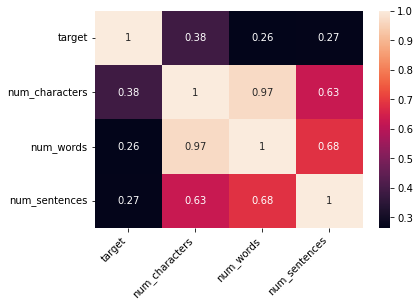

In [29]:
# as we can see there is slightly collinearity in data
g = sns.heatmap(df.corr(),annot=True)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## <u>3.Data Preprocessing</u>
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming
* Feature Extraction

In [30]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [31]:
def transform_text(text):
    text = text.lower() # lower casing
    text = nltk.word_tokenize(text) # tokenization
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear() # remove special characters
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: # stopword & punctuation remove
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i)) # stemming
            
    return " ".join(y)

In [32]:
transform_text('I love to see the Artificial Intelligence Models. How about yOu?')

'love see artifici intellig model'

In [33]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [34]:
df['transformed_text'] = df['text'].apply(transform_text)

In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


***World cloud :***
 A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it's important.

In [36]:
# Let's see the wich words are use to make a message spam or ham by bolding those words 

In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [38]:
# for spam
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

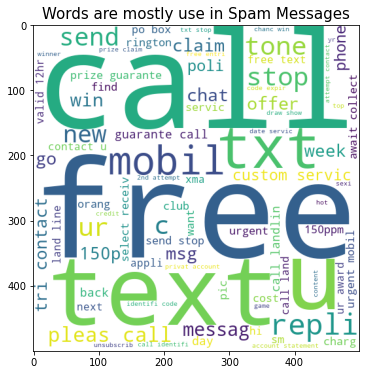

In [39]:
plt.figure(figsize=(9,6))
plt.imshow(spam_wc)
plt.title('Words are mostly use in Spam Messages', size=15)
plt.show()

In [40]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

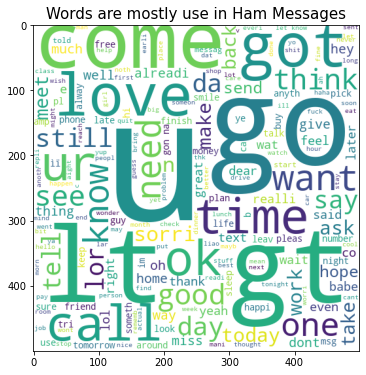

In [41]:
plt.figure(figsize=(9,6))
plt.imshow(ham_wc)
plt.title('Words are mostly use in Ham Messages', size=15)
plt.show()

In [42]:
# now i see the top 30 words which make a message spam
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)

9939

In [44]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30)).head(10)
# it tells us that a particular word exists with how much frequency in the text.i check the most 30 words that are used in the text to make the message spam

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


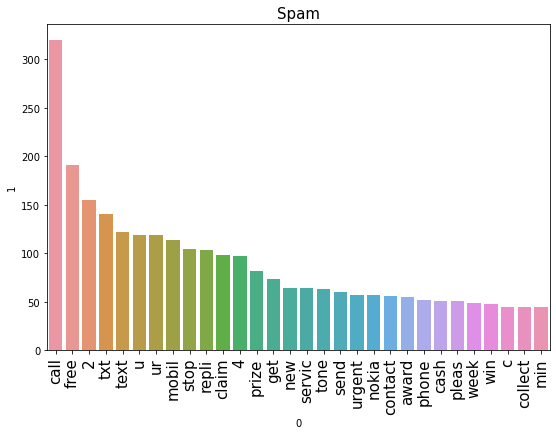

In [45]:
plt.figure(figsize=(9,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation=90, size=15)
plt.title('Spam', size=15)
plt.show()

In [46]:
# now i see the top 30 words which make a message Ham
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [47]:
len(ham_corpus)

35402

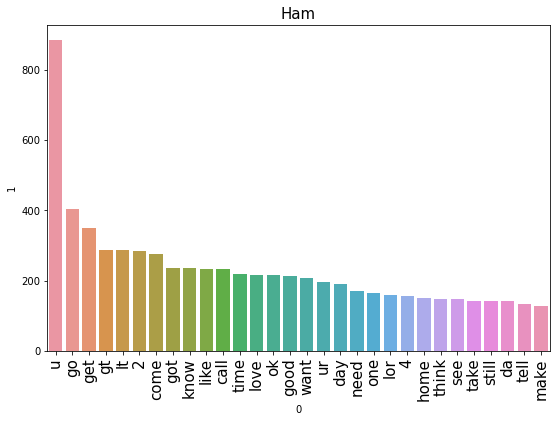

In [48]:
plt.figure(figsize=(9,6))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
            pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation=90, size=15)
plt.title('Ham',size=15)
plt.show()

## <u>4.Model building</u>

In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer() # i will use the Bag of Word technique to converting the text into numbers
tfidf = TfidfVectorizer(max_features=3000)

In [50]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [51]:
print(X.shape)
X

(5169, 6708)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [52]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
# train test split the text
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [54]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [55]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

rf = RandomForestClassifier()

In [56]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print('\n',confusion_matrix(y_test, y_pred1),'\n')
print(precision_score(y_test, y_pred1))

0.8800773694390716

 [[792 104]
 [ 20 118]] 

0.5315315315315315


In [57]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print('\n',confusion_matrix(y_test, y_pred2),'\n')
print(precision_score(y_test, y_pred2))

0.9642166344294004

 [[871  25]
 [ 12 126]] 

0.8344370860927153


In [58]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print('\n',confusion_matrix(y_test, y_pred3),'\n')
print(precision_score(y_test, y_pred3))

0.9700193423597679

 [[893   3]
 [ 28 110]] 

0.9734513274336283


In [59]:
rf.fit(X_train, y_train)
y_pred4 = rf.predict(X_test)
print(accuracy_score(y_test, y_pred4))
print('\n',confusion_matrix(y_test, y_pred4),'\n')
print(precision_score(y_test, y_pred4))

0.9729206963249516

 [[894   2]
 [ 26 112]] 

0.9824561403508771


In [60]:
# Let's try to check multiple algorithms

In [61]:
# Trying different models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [62]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [63]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [64]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [65]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9303675048355899, 0.7661290322580645)

In [66]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9303675048355899
Precision -  0.7661290322580645
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9264990328820116
Precision -  0.9428571428571428
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
[10:07:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.96638

In [67]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [68]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,RF,0.971954,1.000000
8,ETC,0.976789,0.991379
4,LR,0.970986,0.973684
10,xgb,0.973888,0.966387
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
3,DT,0.926499,0.942857
7,BgC,0.962282,0.915966
2,NB,0.964217,0.834437


In [69]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1.head()

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,RF,Accuracy,0.971954
2,ETC,Accuracy,0.976789
3,LR,Accuracy,0.970986
4,xgb,Accuracy,0.973888


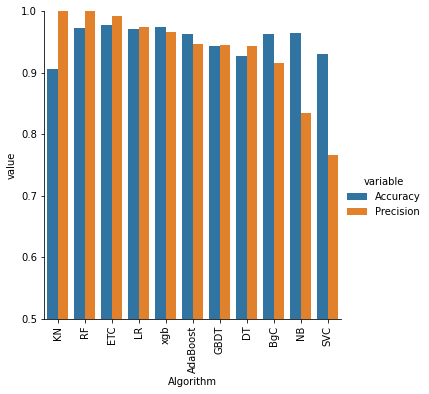

In [70]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [71]:
# model improve

In [72]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [73]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [74]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [75]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [76]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [77]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000
1,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,ETC,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379
3,LR,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684
4,xgb,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387
5,AdaBoost,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429
6,GBDT,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444
7,DT,0.926499,0.942857,0.926499,0.942857,0.926499,0.942857,0.926499,0.942857
8,BgC,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966
9,NB,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437


In [78]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [79]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [80]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [81]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.976


In [82]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [83]:
from sklearn.ensemble import StackingClassifier

In [84]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [85]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9615384615384616


In [86]:
# so here i had tried many algorithms and techniques to improve the accuracy and precision but i decide to take
# random forest as my model for training

In [87]:
rf2 = RandomForestClassifier(n_estimators=200)

In [88]:
rf2.fit(X_train, y_train)
y_pred4 = rf2.predict(X_test)
print(accuracy_score(y_test, y_pred4))
print('\n',confusion_matrix(y_test, y_pred4),'\n')
print(precision_score(y_test, y_pred4))

0.9729206963249516

 [[895   1]
 [ 27 111]] 

0.9910714285714286


I have got 97% accuracy with 100% Precision

#### ***Please give a thumbs up to this notebook if you like it so that kaggle share this to other students as well Thanks!***